# Figure of regions over which to calculate average residence time profiles

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean
import pickle
from matplotlib.colors import ListedColormap

%matplotlib inline

#### Parameters:

In [2]:
# domain dimensions:
jmin, jmax = 159, 799
imin, imax = 1139, 2179
jsize = jmax-jmin
isize = imax-imin

# Rimwidths:
rimwidthN  = 10
rimwidthS  = 10
rimwidthW  = 10
rimwidthE  = 20

# Boundary coordinates: (i1,i2,j1,j2)
bdy_NCB = (1598,2177,777,797) # Northern Canada Basin
bdy_WCB = (2167,2177,390,797) # Western Canada Basin
bdy_LS  = (1140,1150,446,672) # Baffin Bay
bdy_HB  = (1190,1472,291,301) # Hudson Bay

# Colors:
land_color  = '#a9a7a2'

#### Load files:

In [3]:
# Modified ANHA12 mesh mask file (http://knossos.eas.ualberta.ca/anha/anhatable.php)
mfile        = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20230213.nc')
mesh_lon     = mfile['nav_lon'].values
mesh_lat     = mfile['nav_lat'].values
mask         = mfile['tmask'].values[0]
mesh_bathy   = mfile['tmask'].values[0,:,:,:]
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)

In [4]:
# General file:
mesh  = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
hdept = mesh['hdept'].values[0,:,:]

#### Functions

Create mask for different regions to create average profiles over:

In [5]:
# Average basin profiles for different regions 
# --- Canada Basin ---
CB_mask  = np.zeros(bathy_masked.shape)
CB_mask[:,imin+10:imax-10,jmin+10:jmax-20] = 1 # excluding the regions of boundary conditions
for depth in range(0,50):
    CB_mask[depth][mesh_lon > -80]   = 0
    CB_mask[depth][hdept < 2000]     = 0

CB_mask[mesh_bathy < 0.1] = 0

# --- CAA ---
CAA_mask = np.zeros(bathy_masked.shape)
CAA_mask[:,imin+10:imax-10,jmin+10:jmax-20] = 1 # excluding the regions of boundary conditions
for depth in range(0,50):
    CAA_mask[depth][hdept > 500]     = 0
    CAA_mask[depth][mesh_lon < -130] = 0
    CAA_mask[depth][mesh_lon > -40]  = 0
    CAA_mask[depth][mesh_lat < 65]   = 0
    CAA_mask[depth][(mesh_lat < 75) & (mesh_lon >-75)] = 0
    
CAA_mask[mesh_bathy < 0.1] = 0

# --- Baffin Bay ---
BB_mask  = np.zeros(bathy_masked.shape)
BB_mask[:,imin+10:imax-10,jmin+10:jmax-20] = 1 # excluding the regions of boundary conditions
for depth in range(0,50):
    BB_mask[depth][mesh_lon < -75]   = 0
    BB_mask[depth][hdept < 1000]     = 0
    BB_mask[depth][mesh_lat <= 65]   = 0
    BB_mask[depth][mesh_lat > 80]    = 0

BB_mask[mesh_bathy < 0.1] = 0
    
# --- Labrador Sea ---
LS_mask  = np.zeros(bathy_masked.shape)
LS_mask[:,imin+10:imax-10,jmin+10:jmax-20] = 1 # excluding the regions of boundary conditions
for depth in range(0,50):
    LS_mask[depth][mesh_lon < -75]   = 0
    LS_mask[depth][mesh_lat > 65]    = 0
    LS_mask[depth][hdept < 2000]     = 0
    
LS_mask[mesh_bathy < 0.1] = 0

#### Figure:

In [27]:
cmap1 = ListedColormap(['#d2e1eb'])
cmap2 = ListedColormap(['#699dbd'])
cmap3 = ListedColormap(['#46697e'])
cmap4 = ListedColormap(['#23343f'])

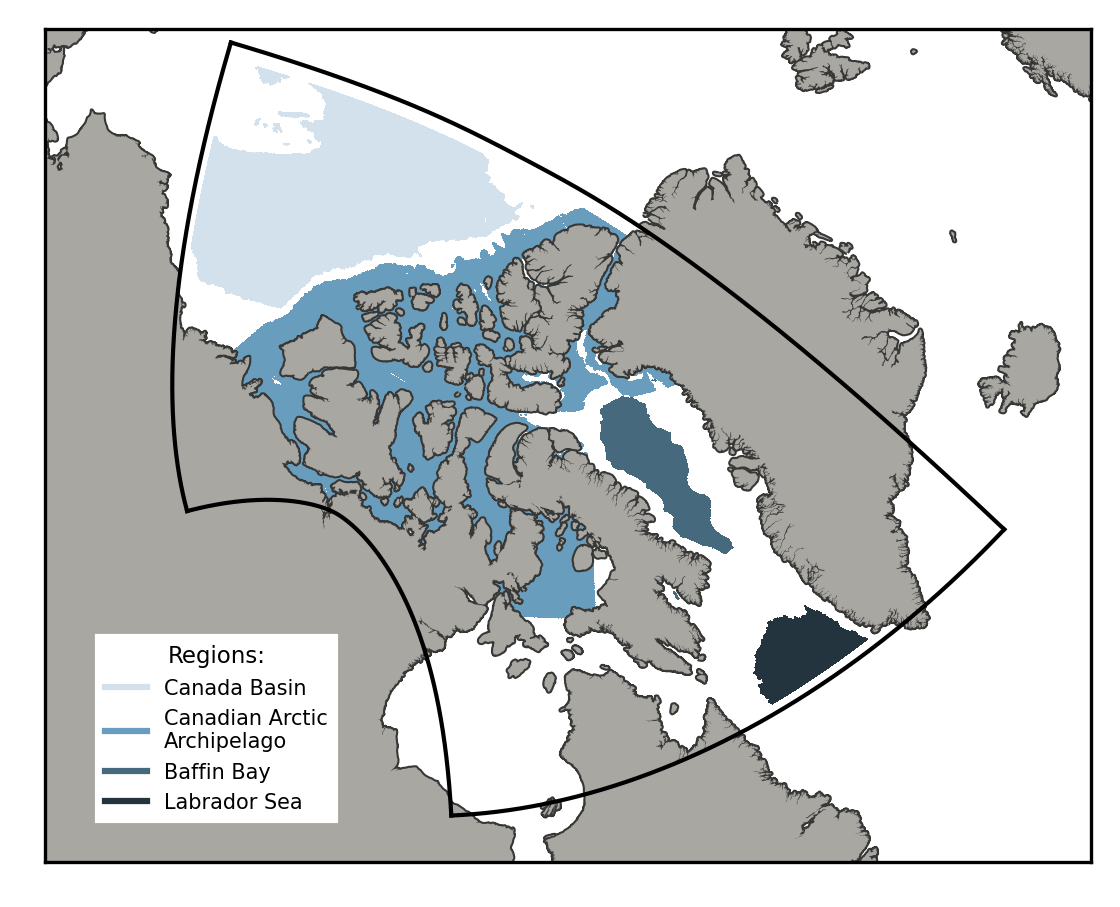

In [51]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))

layer=0
x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 

proj1.plot(x[:,0] ,y[:,0] ,'-k', linewidth=1.0)
proj1.plot(x[:,-1],y[:,-1],'-k', linewidth=1.0)
proj1.plot(x[0,:] ,y[0,:] ,'-k', linewidth=1.0)
proj1.plot(x[-1,:],y[-1,:],'-k', linewidth=1.0)

CB_mask_plot  = np.ma.masked_where(CB_mask < 1 , CB_mask)
CAA_mask_plot = np.ma.masked_where(CAA_mask < 1, CAA_mask)
BB_mask_plot  = np.ma.masked_where(BB_mask < 1 , BB_mask)
LS_mask_plot  = np.ma.masked_where(LS_mask < 1 , LS_mask)
proj1.pcolormesh(x, y, CB_mask_plot[layer,imin:imax,jmin:jmax] , cmap=cmap1)
proj1.pcolormesh(x, y, CAA_mask_plot[layer,imin:imax,jmin:jmax], cmap=cmap2)
proj1.pcolormesh(x, y, BB_mask_plot[layer,imin:imax,jmin:jmax] , cmap=cmap3)
proj1.pcolormesh(x, y, LS_mask_plot[layer,imin:imax,jmin:jmax] , cmap=cmap4)

ax1.plot([0,0], [0,0], c='#d2e1eb', label='Canada Basin') 
ax1.plot([0,0], [0,0], c='#699dbd', label='Canadian Arctic\nArchipelago')
ax1.plot([0,0], [0,0], c='#46697e', label='Baffin Bay') 
ax1.plot([0,0], [0,0], c='#23343f', label='Labrador Sea')

leg = ax1.legend(loc=(0.05, 0.05), fontsize=5, facecolor='white', fancybox=False, framealpha=1, edgecolor='white')
leg.set_title('Regions:', prop={'size':5.5})

fig.savefig('/ocean/brogalla/GEOTRACES/figures/Pb_explorations/S6-regions.jpg', bbox_inches='tight', dpi=300)